## Coding Exercise #0314

### 1. Bagging ensemble:

In [40]:
# Install once.
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore') 
from sklearn.model_selection import RandomizedSearchCV                 # Turn off the warnings.

#### 1.1. Read in data:

In [42]:
# Load data.
data = load_breast_cancer()

In [43]:
# Explanatory variables.
X = data.data
variable_names = data.feature_names
print(variable_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [44]:
X.shape

(569, 30)

In [45]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [46]:
#Split with test_size=0.3, random_state=1234

X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=1234)
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

#### 1.2. Random Forest:

In [47]:
# Classification by Random Forest.
#n_estimators=100, and for other parameters CHOOOOSE
RFC = RandomForestClassifier(n_estimators=100,criterion='entropy')
#Train part
model=RFC.fit(X_train,Y_train)
#Predict
Y_pred =RFC.predict(X_test)

#Accuracy
print( f"Random Forest accuracy : {metrics.accuracy_score(Y_test,Y_pred)}" )

Random Forest accuracy : 0.9239766081871345


mean concave points     0.145497
worst concave points    0.143960
worst perimeter         0.128216
worst radius            0.103382
worst area              0.066970
worst concavity         0.047521
mean concavity          0.042179
mean radius             0.041838
area error              0.039469
mean perimeter          0.030448
dtype: float64


[Text(0, 0, 'mean concave points'),
 Text(0, 0, 'worst concave points'),
 Text(0, 0, 'worst perimeter'),
 Text(0, 0, 'worst radius'),
 Text(0, 0, 'worst area'),
 Text(0, 0, 'worst concavity'),
 Text(0, 0, 'mean concavity'),
 Text(0, 0, 'mean radius'),
 Text(0, 0, 'area error'),
 Text(0, 0, 'mean perimeter')]

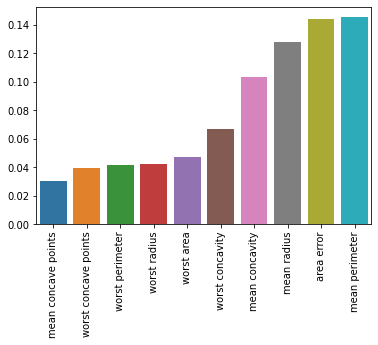

In [48]:
# Display the top 10 most important variables.
variable_importance = pd.Series(RFC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
print(top_variables_10)

#Using a bar plot
sns.barplot(x=top_variables_10,y=variable_importance).set_xticklabels(top_variables_10.index,rotation='vertical', fontsize=10)

### 2. Boosting Ensemble:

#### 2.1.  AdaBoost:

In [49]:
# Classification by AdaBoost.
#(max_depth=10), n_estimators=100
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.27) #This learning rate value gives the best accuracy
#Train part
model=ABC.fit(X_train,Y_train)
#Prediction
Y_pred = ABC.predict(X_test)

#Accuracy
print( "AdaBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost accuracy : 0.953


[Text(0, 0, 'mean texture'),
 Text(0, 0, 'worst area'),
 Text(0, 0, 'worst concave points'),
 Text(0, 0, 'worst texture'),
 Text(0, 0, 'worst perimeter'),
 Text(0, 0, 'worst smoothness'),
 Text(0, 0, 'mean concave points')]

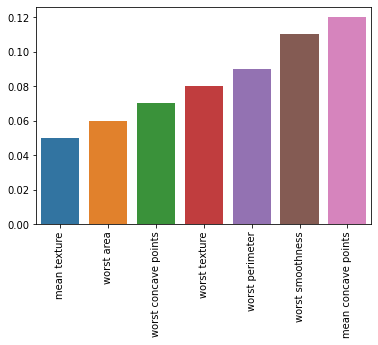

In [50]:
# Display the top 10 most important variables.
variable_importance = pd.Series(ABC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]


#Using a bar plot
sns.barplot(x=top_variables_10,y=variable_importance).set_xticklabels(top_variables_10.index,rotation='vertical', fontsize=10)


#### 2.2.  Gradient Boosting:

In [51]:
# Classification by Gradient Boosting.
#n_estimators=10, for otrher parameters choose
GBC = GradientBoostingClassifier(n_estimators=10, learning_rate=0.27)

#Train part
model=GBC.fit(X_train,Y_train)
#Predict
Y_pred = GBC.predict(X_test)

#Accuracy
print( "Gradient Boosting accuracy :" + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)) )

Gradient Boosting accuracy :0.912


[Text(0, 0, 'worst concave points'),
 Text(0, 0, 'mean concave points'),
 Text(0, 0, 'worst perimeter'),
 Text(0, 0, 'worst area'),
 Text(0, 0, 'worst texture'),
 Text(0, 0, 'worst radius'),
 Text(0, 0, 'area error'),
 Text(0, 0, 'worst smoothness'),
 Text(0, 0, 'worst fractal dimension'),
 Text(0, 0, 'mean texture')]

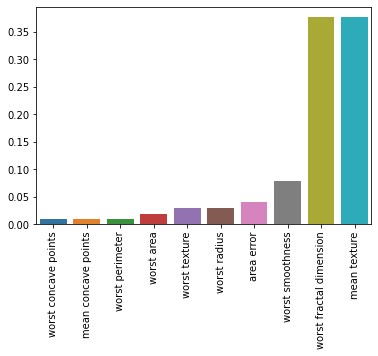

In [52]:
# Display the top 10 most important variables.
variable_importance = pd.Series(GBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]


#Using a bar plot
sns.barplot(x=top_variables_10,y=variable_importance).set_xticklabels(top_variables_10.index,rotation='vertical', fontsize=10)


#### 2.3. XGBoost:

In [53]:
# Classification by XGBoost.
#n_estimator = 500 for other parameters choose
XGBC = XGBClassifier(n_estimator=500, learning_rate=0.27)

#Train part
model=XGBC.fit(X_train, Y_train)
#Predict 
Y_pred = XGBC.predict(X_test)

#Accuracy
print( "XGBoost accuracy : "+ str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)) )

XGBoost accuracy : 0.942


[Text(0, 0, 'mean concave points'),
 Text(0, 0, 'worst perimeter'),
 Text(0, 0, 'worst concave points'),
 Text(0, 0, 'worst radius'),
 Text(0, 0, 'worst fractal dimension'),
 Text(0, 0, 'worst area'),
 Text(0, 0, 'mean concavity'),
 Text(0, 0, 'worst concavity'),
 Text(0, 0, 'worst texture'),
 Text(0, 0, 'area error')]

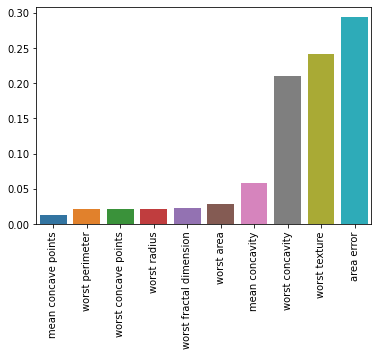

In [54]:
# Display the top 10 most important variables.
variable_importance = pd.Series(XGBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]


#Using a bar plot
sns.barplot(x=top_variables_10,y=variable_importance).set_xticklabels(top_variables_10.index,rotation='vertical', fontsize=10)


NOTE: The hyperparameters of XGBClassifier can be optimized using GridSearchCV() and RandomSearchCV(). Students are encouraged to explore. 

In [55]:
#GridSearch
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbc = XGBClassifier()
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, Y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}
Lowest RMSE:  0.14186818628036735


In [58]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbc = XGBClassifier()
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         n_iter=25,
                         verbose=1)
clf.fit(X_train, Y_train)
print("Best parameters:", clf.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.6}
